# MASA Hackathon 2022

## Data Dictionary
Row: 63326 rows

Columns: 11 columns
- Agency: 16 types 'XXX'
- Agency Type: Airlines/Travel Agency
- Distribution Channel: Online/Offline
- Product Name: 26 types
- Claim: Yes/No
- Duration: -2 to 4881 (Error: Negative/0, Outliers)
- Destination: 149 countries
- Net Sale: -389 to 810 (Error maybe: Negative)
- Commision: 0 to 283.5
- Gender: F/M (Missing values)
- Age: 0 to 118 (Outliers)

## Load Library

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [2]:
# Format code to pep8 standard
# Type in terminal: autopep8 --in-place -a -a Testing01.ipynb

## Data Analysis

In [3]:
# Read data
df = pd.read_csv('Dataset/Travel Insurance.csv')
df.shape

(63326, 11)

In [4]:
# Display the column name
df.columns 

Index(['Agency', 'AgencyType', 'DistributionChannel', 'ProductName', 'Claim',
       'Duration', 'Destination', 'NetSales', 'Commision', 'Gender', 'Age'],
      dtype='object')

In [5]:
# First five rows of the data
df.head()

,Agency,AgencyType,DistributionChannel,ProductName,Claim,Duration,Destination,NetSales,Commision,Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [6]:
# Numerical data info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,63326.0,49.317074,101.791566,-2.0,9.0,22.00,53.00,4881.0
NetSales,63326.0,40.702018,48.845637,-389.0,18.0,26.53,48.00,810.0
Commision,63326.0,9.809992,19.804388,0.0,0.0,0.00,11.55,283.5
Age,63326.0,39.969981,14.017010,0.0,35.0,36.00,43.00,118.0


In [7]:
# The count and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Agency               63326 non-null  object 
 1   AgencyType           63326 non-null  object 
 2   DistributionChannel  63326 non-null  object 
 3   ProductName          63326 non-null  object 
 4   Claim                63326 non-null  object 
 5   Duration             63326 non-null  int64  
 6   Destination          63326 non-null  object 
 7   NetSales             63326 non-null  float64
 8   Commision            63326 non-null  float64
 9   Gender               18219 non-null  object 
 10  Age                  63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [8]:
df.columns

Index(['Agency', 'AgencyType', 'DistributionChannel', 'ProductName', 'Claim',
       'Duration', 'Destination', 'NetSales', 'Commision', 'Gender', 'Age'],
      dtype='object')

In [9]:
# Group by & Count distinct row
df.Agency.value_counts()
df.AgencyType.value_counts()
df.DistributionChannel.value_counts()
df.ProductName.value_counts()
df.Claim.value_counts()
df.Duration.value_counts()
df.Destination.value_counts()
df.NetSales.value_counts()
df.Commision.value_counts()
df.Gender.value_counts()
df.Age.value_counts()

36    24142
31     2663
48     2405
35     2348
30     1341
      ...  
3         4
5         3
0         2
4         1
2         1
Name: Age, Length: 89, dtype: int64

# Statistical Test

## Simple linear regression analysis

### Relationship between Duration & Net Sales

In [10]:
# Make a copy of data
# Keep Duration & Net Sales only
dftest1_features = ['Duration','NetSales']
dftest1 = df[dftest1_features]

# Check deleted columns
dftest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  63326 non-null  int64  
 1   NetSales  63326 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 989.6 KB


Estimated coefficients:
b_0 = 30.54406602637408            
b_1 = 0.2059723177332796


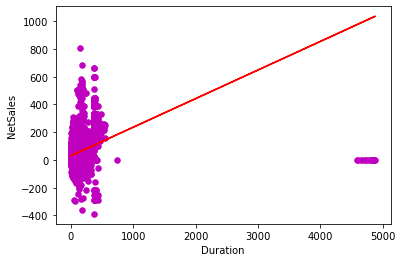

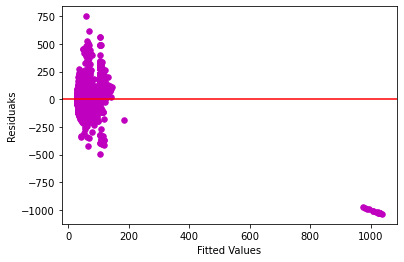

In [11]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
  
    # putting labels
    plt.xlabel(x.name)
    plt.ylabel(y.name)
  
    # function to show plot
    plt.show()

def plot_residuals_against_fitted_values(x,y,b):
    # predicted response vector
    y_pred = b[0] + b[1]*x

    # calculate residuals
    residuals = y - y_pred
    
    # plotting the residuals against the fitted values as scatter plot
    plt.scatter(y_pred, residuals, color = "m",
               marker = "o", s = 30)

    # putting labels
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuaks')

    #plot a straight line y=0
    plt.axhline(y=0, color='r', linestyle='-')

    # function to show plot
    plt.show()
  
  
def main():
    # observations / data
    x = dftest1['Duration']
    y = dftest1['NetSales']
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)

    # checking assumptions
    plot_residuals_against_fitted_values(x,y,b)
  
if __name__ == "__main__":
    main()

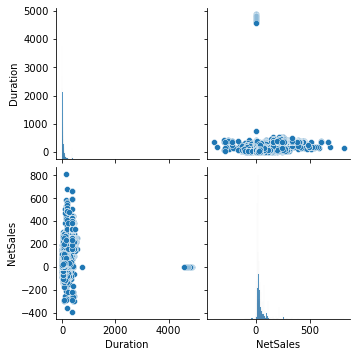

In [12]:
# Relationship of dataset
sns.pairplot(dftest1)

### Relationship between Age & Net Sales

In [13]:
dftest2_features = ['Age','NetSales']
dftest2 = df[dftest2_features]

dftest2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       63326 non-null  int64  
 1   NetSales  63326 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 989.6 KB


Estimated coefficients:
b_0 = 35.44317188927522           
b_1 = 0.1315698928189223


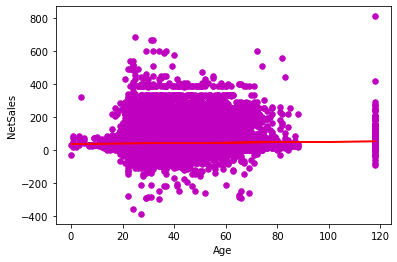

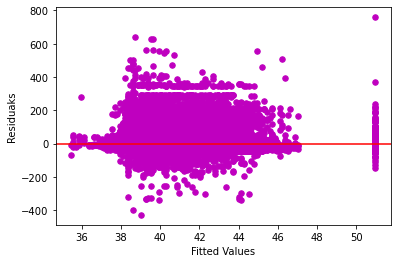

In [14]:
 def main():
    # observations / data
    x = dftest2['Age']
    y = dftest2['NetSales']
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)

    # checking assumptions
    plot_residuals_against_fitted_values(x,y,b)
  
if __name__ == "__main__":
    main()

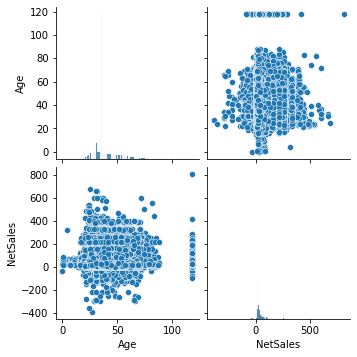

In [15]:
# Relationship of dataset
sns.pairplot(dftest2)

### Relationship between Age & Duration

In [16]:
dftest3_features = ['Age','Duration']
dftest3 = df[dftest3_features]

dftest3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       63326 non-null  int64
 1   Duration  63326 non-null  int64
dtypes: int64(2)
memory usage: 989.6 KB


Estimated coefficients:
b_0 = 48.6005888586795            
b_1 = 0.01792557024140592


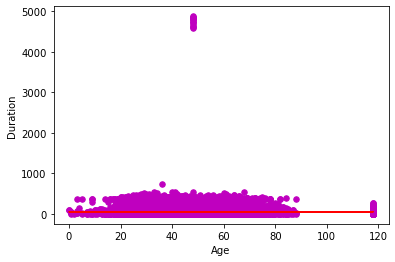

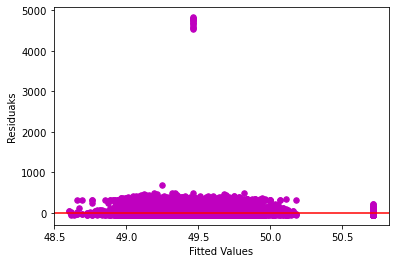

In [17]:
def main():
    # observations / data
    x = dftest3['Age']
    y = dftest3['Duration']
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)

    # checking assumptions
    plot_residuals_against_fitted_values(x,y,b)
  
if __name__ == "__main__":
    main()

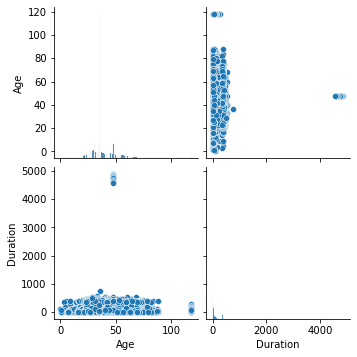

In [18]:
sns.pairplot(dftest3)

## Multiple linear regression analysis

### Relationship between Age & Duration & Net Sales

In [19]:
dftest4_features = ['Age','Duration','NetSales']
dftest4 = df[dftest4_features]
dftest4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       63326 non-null  int64  
 1   Duration  63326 non-null  int64  
 2   NetSales  63326 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


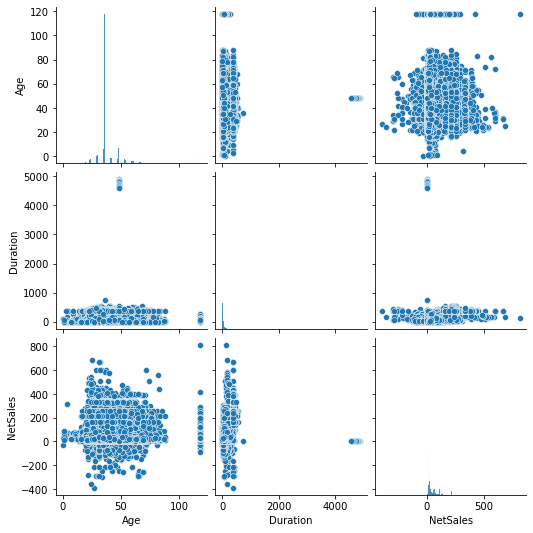

In [20]:
# Relationship of dataset
sns.pairplot(dftest4)

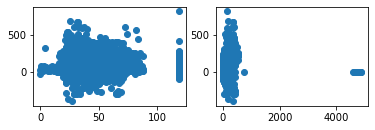

In [21]:
dftest5_features = ['Age','Duration']
X = df[dftest5_features]
y = df.NetSales

plt.subplot(2,2,1)
plt.scatter(X['Age'],y)
plt.subplot(2,2,2)
plt.scatter(X['Duration'],y)

Text(0.5, 0, 'Net Sales')

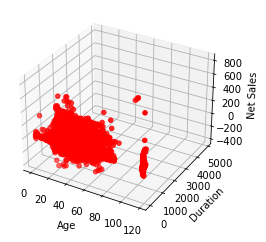

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x1 = X['Age']
x2 = X['Duration']

ax.scatter(x1,x2,y,c='red',marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Duration')
ax.set_zlabel('Net Sales')

In [23]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X,y)

LinearRegression()

In [24]:
theta0 = mlr_model.intercept_
theta1, theta2 = mlr_model.coef_
theta0,theta1,theta2

(25.4349084708817, 0.1278785007368896, 0.205928850934094)

In [25]:
# Testing my prediction
y_pred = mlr_model.predict([[50,500]])
y_pred

array([134.79325897])